In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv("train_set.csv")
train_data.head()

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106


In [3]:
for cols in train_data:
  print(train_data[cols].value_counts())

2014    86463
2013    83678
2015    79723
2016    37972
Name: Year, dtype: int64
2    91173
4    62854
1    54752
3    26807
5    26127
6    25829
7      294
Name: OGC, dtype: int64
Public Works, Transportation & Commerce     91256
Community Health                            62828
Public Protection                           54769
Human Welfare & Neighborhood Development    26702
Culture & Recreation                        26074
General Administration & Finance            25914
General City Responsibilities                 293
Name: OG, dtype: int64
DPH    62834
MTA    42171
DSS    23839
POL    22896
REC    15972
AIR    13511
FIR    11584
DPW    10977
SHF     7395
ADM     7364
PUC     6749
LIB     6598
WTR     5785
CWP     4112
CRT     3958
HHP     2897
JUV     2363
CAT     2339
DBI     2225
DAT     2141
HRD     2041
ECD     2036
CON     2034
TIS     1990
FAM     1945
PRT     1931
TTX     1893
CPC     1885
REG     1834
ASR     1293
PDR     1218
ADP     1175
ENV      997
BOS      872
MYR

In [4]:
train_data.isnull().sum()

Year                   0
OGC                    0
OG                     0
DC                     0
Dept                   0
UC                     0
Union                 36
JF                    38
Job                    0
EI                     0
Salaries               0
Overtime               0
H/D                    0
YT                     0
Total_Compensation     0
dtype: int64

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287836 entries, 0 to 287835
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                287836 non-null  int64  
 1   OGC                 287836 non-null  int64  
 2   OG                  287836 non-null  object 
 3   DC                  287836 non-null  object 
 4   Dept                287836 non-null  object 
 5   UC                  287836 non-null  int64  
 6   Union               287800 non-null  object 
 7   JF                  287798 non-null  object 
 8   Job                 287836 non-null  object 
 9   EI                  287836 non-null  int64  
 10  Salaries            287836 non-null  int64  
 11  Overtime            287836 non-null  int64  
 12  H/D                 287836 non-null  float64
 13  YT                  287836 non-null  object 
 14  Total_Compensation  287836 non-null  int64  
dtypes: float64(1), int64(7), object(7)

In [6]:
train_data.dropna(inplace=True)

In [7]:
train_data.isnull().sum()

Year                  0
OGC                   0
OG                    0
DC                    0
Dept                  0
UC                    0
Union                 0
JF                    0
Job                   0
EI                    0
Salaries              0
Overtime              0
H/D                   0
YT                    0
Total_Compensation    0
dtype: int64

In [8]:
train_data['Union'].unique()

array(['SEIU - Health Workers, Local 1021',
       'Stationary Engineers, Local 39',
       'Prof & Tech Engineers - Miscellaneous, Local 21',
       "Police Officers' Association", 'SEIU - Miscellaneous, Local 1021',
       'SEIU - Human Services, Local 1021',
       'Automotive Machinists, Local 1414',
       'Firefighters - Chiefs/Fire Boat Workers, Local 798',
       'Firefighters - Miscellaneous, Local 798',
       'Transportation Workers, Local 200',
       'Transport Workers - Transit Operators, Local 250-A',
       'Laborers, Local 261',
       'Prof & Tech Engineers - Court Attorneys, Local 21',
       "Deputy Sheriffs' Association",
       'SEIU - Staff and Per Diem Nurses, Local 1021',
       'Transport Workers - Auto Svc Workers, Local 250-A',
       'Municipal Executive Association - Miscellaneous',
       'Teamsters - Supervising Nurses, Local 856',
       'Electrical Workers, Local 6',
       'Prof & Tech Engineers - Personnel, Local 21',
       'Plumbers and Pipefitters

In [9]:
train_data

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287831,2016,3,Human Welfare & Neighborhood Development,DSS,Human Services,535,"SEIU - Human Services, Local 1021",Human Services,Senior Eligibility Worker,9610,78980,30115,13068.80,Fiscal,147079
287832,2015,5,Culture & Recreation,LIB,Public Library,790,"SEIU - Miscellaneous, Local 1021",Library,Librarian 1,790,30704,0,5465.57,Calendar,40174
287833,2014,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,6,"Electrical Workers, Local 6",Journeyman Trade,Electronic Maintenance Tech,38352,104451,0,13054.94,Calendar,164669
287834,2013,1,Public Protection,JUV,Juvenile Probation,250,"SEIU - Health Workers, Local 1021",Housekeeping & Laundry,Porter,29266,14425,0,4051.90,Calendar,19594


In [10]:
cols = ['DC','Dept','Union','JF','Job']

train_data.DC.value_counts().to_dict()
df_frequency_map = train_data.DC.value_counts().to_dict()
train_data.DC = train_data.DC.map(df_frequency_map)  

In [25]:
train_data

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,62834,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,Community Health,62834,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,General Administration & Finance,1293,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,Public Protection,22896,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,"Public Works, Transportation & Commerce",2897,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287831,2016,3,Human Welfare & Neighborhood Development,23839,Human Services,535,"SEIU - Human Services, Local 1021",Human Services,Senior Eligibility Worker,9610,78980,30115,13068.80,Fiscal,147079
287832,2015,5,Culture & Recreation,6598,Public Library,790,"SEIU - Miscellaneous, Local 1021",Library,Librarian 1,790,30704,0,5465.57,Calendar,40174
287833,2014,2,"Public Works, Transportation & Commerce",2897,PUC Hetch Hetchy,6,"Electrical Workers, Local 6",Journeyman Trade,Electronic Maintenance Tech,38352,104451,0,13054.94,Calendar,164669
287834,2013,1,Public Protection,2363,Juvenile Probation,250,"SEIU - Health Workers, Local 1021",Housekeeping & Laundry,Porter,29266,14425,0,4051.90,Calendar,19594


In [26]:
train_data.Dept.value_counts().to_dict()
df_frequency_map = train_data.Dept.value_counts().to_dict()
train_data.Dept = train_data.Dept.map(df_frequency_map)

In [27]:
train_data.head()

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,62834,62859,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,Community Health,62834,62859,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,General Administration & Finance,1293,1301,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,Public Protection,22896,22911,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,"Public Works, Transportation & Commerce",2897,2894,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106


In [11]:
train_data.Union.value_counts().to_dict()
df_frequency_map = train_data.Union.value_counts().to_dict()
train_data.Union = train_data.Union.map(df_frequency_map)

In [29]:
train_data

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,62834,62859,250,16317,Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,Community Health,62834,62859,39,4602,Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,General Administration & Finance,1293,1301,21,36130,Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,Public Protection,22896,22911,911,19177,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,"Public Works, Transportation & Commerce",2897,2894,21,36130,Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287831,2016,3,Human Welfare & Neighborhood Development,23839,23847,535,12752,Human Services,Senior Eligibility Worker,9610,78980,30115,13068.80,Fiscal,147079
287832,2015,5,Culture & Recreation,6598,6597,790,81349,Library,Librarian 1,790,30704,0,5465.57,Calendar,40174
287833,2014,2,"Public Works, Transportation & Commerce",2897,2894,6,6059,Journeyman Trade,Electronic Maintenance Tech,38352,104451,0,13054.94,Calendar,164669
287834,2013,1,Public Protection,2363,2356,250,16317,Housekeeping & Laundry,Porter,29266,14425,0,4051.90,Calendar,19594


In [30]:
train_data.JF.value_counts().to_dict()
df_frequency_map = train_data.JF.value_counts().to_dict()
train_data.JF = train_data.JF.map(df_frequency_map)   

In [31]:
train_data

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,62834,62859,250,16317,5777,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,Community Health,62834,62859,39,4602,17052,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,General Administration & Finance,1293,1301,21,36130,1357,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,Public Protection,22896,22911,911,19177,19170,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,"Public Works, Transportation & Commerce",2897,2894,21,36130,6423,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287831,2016,3,Human Welfare & Neighborhood Development,23839,23847,535,12752,14869,Senior Eligibility Worker,9610,78980,30115,13068.80,Fiscal,147079
287832,2015,5,Culture & Recreation,6598,6597,790,81349,5380,Librarian 1,790,30704,0,5465.57,Calendar,40174
287833,2014,2,"Public Works, Transportation & Commerce",2897,2894,6,6059,17052,Electronic Maintenance Tech,38352,104451,0,13054.94,Calendar,164669
287834,2013,1,Public Protection,2363,2356,250,16317,9370,Porter,29266,14425,0,4051.90,Calendar,19594


In [32]:
train_data.Job.value_counts().to_dict()
df_frequency_map = train_data.Job.value_counts().to_dict()
train_data.Job = train_data.Job.map(df_frequency_map)

In [12]:
train_data

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,62834,Public Health,250,16317,Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,Community Health,62834,Public Health,39,4602,Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,General Administration & Finance,1293,Assessor/Recorder,21,36130,Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,Public Protection,22896,Police,911,19177,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,"Public Works, Transportation & Commerce",2897,PUC Hetch Hetchy,21,36130,Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287831,2016,3,Human Welfare & Neighborhood Development,23839,Human Services,535,12752,Human Services,Senior Eligibility Worker,9610,78980,30115,13068.80,Fiscal,147079
287832,2015,5,Culture & Recreation,6598,Public Library,790,81349,Library,Librarian 1,790,30704,0,5465.57,Calendar,40174
287833,2014,2,"Public Works, Transportation & Commerce",2897,PUC Hetch Hetchy,6,6059,Journeyman Trade,Electronic Maintenance Tech,38352,104451,0,13054.94,Calendar,164669
287834,2013,1,Public Protection,2363,Juvenile Probation,250,16317,Housekeeping & Laundry,Porter,29266,14425,0,4051.90,Calendar,19594


In [13]:
one_hot  =  pd.get_dummies(train_data.YT)

In [14]:
df = pd.concat([train_data, one_hot], axis=1)

In [15]:
df

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation,Calendar,Fiscal
0,2015,4,Community Health,62834,Public Health,250,16317,Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158,1,0
1,2013,4,Community Health,62834,Public Health,39,4602,Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784,0,1
2,2015,6,General Administration & Finance,1293,Assessor/Recorder,21,36130,Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708,1,0
3,2016,1,Public Protection,22896,Police,911,19177,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323,0,1
4,2013,2,"Public Works, Transportation & Commerce",2897,PUC Hetch Hetchy,21,36130,Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287831,2016,3,Human Welfare & Neighborhood Development,23839,Human Services,535,12752,Human Services,Senior Eligibility Worker,9610,78980,30115,13068.80,Fiscal,147079,0,1
287832,2015,5,Culture & Recreation,6598,Public Library,790,81349,Library,Librarian 1,790,30704,0,5465.57,Calendar,40174,1,0
287833,2014,2,"Public Works, Transportation & Commerce",2897,PUC Hetch Hetchy,6,6059,Journeyman Trade,Electronic Maintenance Tech,38352,104451,0,13054.94,Calendar,164669,1,0
287834,2013,1,Public Protection,2363,Juvenile Probation,250,16317,Housekeeping & Laundry,Porter,29266,14425,0,4051.90,Calendar,19594,1,0


In [16]:
f_train_data = df.drop('YT',axis=1)

In [17]:
f_train_data

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,Total_Compensation,Calendar,Fiscal
0,2015,4,Community Health,62834,Public Health,250,16317,Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,16158,1,0
1,2013,4,Community Health,62834,Public Health,39,4602,Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,115784,0,1
2,2015,6,General Administration & Finance,1293,Assessor/Recorder,21,36130,Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,144708,1,0
3,2016,1,Public Protection,22896,Police,911,19177,Police Services,Sergeant 3,33369,140164,52754,13043.87,242323,0,1
4,2013,2,"Public Works, Transportation & Commerce",2897,PUC Hetch Hetchy,21,36130,Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,82106,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287831,2016,3,Human Welfare & Neighborhood Development,23839,Human Services,535,12752,Human Services,Senior Eligibility Worker,9610,78980,30115,13068.80,147079,0,1
287832,2015,5,Culture & Recreation,6598,Public Library,790,81349,Library,Librarian 1,790,30704,0,5465.57,40174,1,0
287833,2014,2,"Public Works, Transportation & Commerce",2897,PUC Hetch Hetchy,6,6059,Journeyman Trade,Electronic Maintenance Tech,38352,104451,0,13054.94,164669,1,0
287834,2013,1,Public Protection,2363,Juvenile Probation,250,16317,Housekeeping & Laundry,Porter,29266,14425,0,4051.90,19594,1,0


In [18]:
f_train_data.corr()

,Year,OGC,DC,UC,Union,EI,Salaries,Overtime,H/D,Total_Compensation,Calendar,Fiscal
Year,1.000000,-0.005957,0.000658,-0.003979,0.005304,0.002027,0.004611,0.015103,-0.013409,0.006229,-0.295226,0.295226
OGC,-0.005957,1.000000,0.129231,-0.006284,0.277971,0.002122,-0.217706,-0.303166,-0.232986,-0.270136,-0.003332,0.003332
DC,0.000658,0.129231,1.000000,0.031375,-0.104213,0.009339,-0.035723,-0.025080,-0.049805,-0.027023,0.005718,-0.005718
UC,-0.003979,-0.006284,0.031375,1.000000,0.495624,-0.001520,-0.047283,0.059856,-0.073160,-0.032210,-0.001511,0.001511
Union,0.005304,0.277971,-0.104213,0.495624,1.000000,0.001758,-0.304243,-0.203421,-0.142577,-0.322451,-0.004434,0.004434
EI,0.002027,0.002122,0.009339,-0.001520,0.001758,1.000000,-0.004347,-0.001154,-0.003429,-0.003929,-0.000361,0.000361
Salaries,0.004611,-0.217706,-0.035723,-0.047283,-0.304243,-0.004347,1.000000,0.271554,0.774865,0.972580,0.007079,-0.007079
Overtime,0.015103,-0.303166,-0.025080,0.059856,-0.203421,-0.001154,0.271554,1.000000,0.312448,0.453492,-0.000826,0.000826
H/D,-0.013409,-0.232986,-0.049805,-0.073160,-0.142577,-0.003429,0.774865,0.312448,1.000000,0.806253,0.009654,-0.009654
Total_Compensation,0.006229,-0.270136,-0.027023,-0.032210,-0.322451,-0.003929,0.972580,0.453492,0.806253,1.000000,0.009363,-0.009363


<AxesSubplot:>

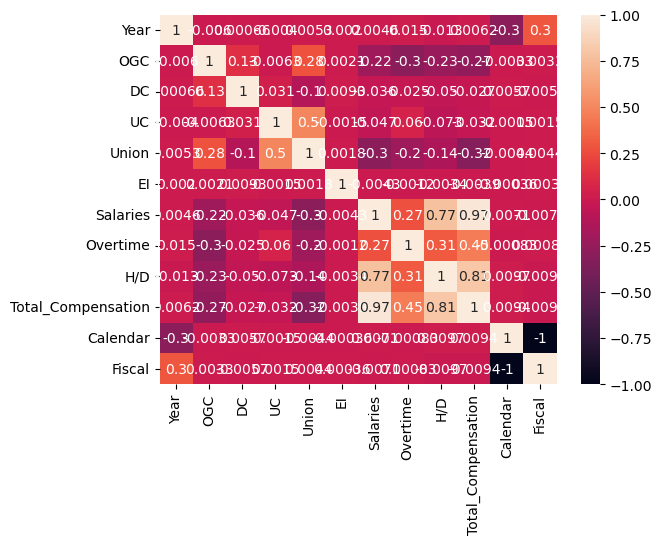

In [19]:
sns.heatmap(f_train_data.corr(),annot=True)

In [20]:
n_train_data = f_train_data.drop_duplicates()

In [21]:
X = n_train_data.drop("Total_Compensation",axis=1)  
y = n_train_data["Total_Compensation"]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((200979, 15), (86134, 15))

In [23]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [24]:
corr_features = correlation(X_train, 0.75)
len(set(corr_features))

2

In [25]:
corr_features

{'Fiscal', 'H/D'}

In [26]:
x_train  = X_train.drop(corr_features,axis=1)
x_test = X_test.drop(corr_features,axis=1)

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [29]:
cols_to_scale = ['Year','OGC','OG','DC','UC','Union','JF','Job','EI','Salaries','Overtime','Calendar']

In [62]:
pip install lazypredict


     ---------------------------------------- 89.1/89.1 MB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 3.8 MB/s eta 0:00:00


In [30]:
import lazypredict 

In [31]:
from lazypredict.Supervised import LazyRegressor

In [32]:
from sklearn.utils import shuffle
import numpy as np

In [33]:
df.isnull().sum() 

Year                  0
OGC                   0
OG                    0
DC                    0
Dept                  0
UC                    0
Union                 0
JF                    0
Job                   0
EI                    0
Salaries              0
Overtime              0
H/D                   0
YT                    0
Total_Compensation    0
Calendar              0
Fiscal                0
dtype: int64

In [34]:
df.dropna(how='any', axis=0, inplace=True)

In [35]:
df.head()

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation,Calendar,Fiscal
0,2015,4,Community Health,62834,Public Health,250,16317,Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158,1,0
1,2013,4,Community Health,62834,Public Health,39,4602,Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784,0,1
2,2015,6,General Administration & Finance,1293,Assessor/Recorder,21,36130,Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708,1,0
3,2016,1,Public Protection,22896,Police,911,19177,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323,0,1
4,2013,2,"Public Works, Transportation & Commerce",2897,PUC Hetch Hetchy,21,36130,Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106,1,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287798 entries, 0 to 287835
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                287798 non-null  int64  
 1   OGC                 287798 non-null  int64  
 2   OG                  287798 non-null  object 
 3   DC                  287798 non-null  int64  
 4   Dept                287798 non-null  object 
 5   UC                  287798 non-null  int64  
 6   Union               287798 non-null  int64  
 7   JF                  287798 non-null  object 
 8   Job                 287798 non-null  object 
 9   EI                  287798 non-null  int64  
 10  Salaries            287798 non-null  int64  
 11  Overtime            287798 non-null  int64  
 12  H/D                 287798 non-null  float64
 13  YT                  287798 non-null  object 
 14  Total_Compensation  287798 non-null  int64  
 15  Calendar            287798 non-nul

<AxesSubplot:>

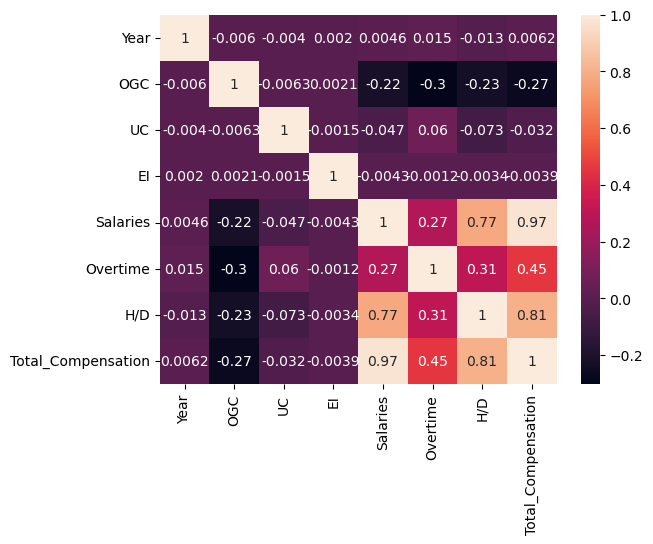

In [8]:
sns.heatmap(df.corr(), annot = True)

In [37]:
x = df.loc[:,['Salaries','Overtime','H/D']]
y = df.iloc[0:,-1]
x

,Salaries,Overtime,H/D
0,12196,0,0.00
1,74639,2820,12703.31
2,100554,0,12424.50
3,140164,52754,13043.87
4,58813,0,7655.28
...,...,...,...
287831,78980,30115,13068.80
287832,30704,0,5465.57
287833,104451,0,13054.94
287834,14425,0,4051.90


In [38]:
df1 = df[df.Salaries < 350000]
x = df1.loc[:,['Salaries','Overtime','H/D']]
y = df1.iloc[0:,-1]

In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [40]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [41]:
lin_reg = LinearRegression(normalize=False)
lin_reg.fit(x_train, y_train)
y_predict_lin_reg = lin_reg.predict(x_test)

In [42]:
lasso = Lasso(alpha=0.1, normalize=False)
lasso.fit(x_train, y_train)
y_predict_lasso = lasso.predict(x_test)